<a href="https://colab.research.google.com/github/MFH97/Artificial-Intelligence/blob/main/Iris_Flower_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 Exercise (Derive your answers by HAND)

A biologist has collected measurements from iris flowers and wants to classify a new sample. The features measured are:
*	Sepal length (cm)
*	Sepal width (cm)
*	Petal length (cm)
*	Petal width (cm)
Training Data (6 samples):
  *	Sample 1 (Setosa):     [5.1, 3.5, 1.4, 0.2]
  *	Sample 2 (Setosa):     [4.9, 3.0, 1.4, 0.2]
  *	Sample 3 (Versicolor): [7.0, 3.2, 4.7, 1.4]
  *	Sample 4 (Versicolor): [6.4, 3.2, 4.5, 1.5]
  *	Sample 5 (Virginica):  [6.3, 3.3, 6.0, 2.5]
  *	Sample 6 (Virginica):  [5.8, 2.7, 5.1, 1.9]

New Sample to Classify:
*	Unknown Sample: [6.2, 3.4, 5.4, 2.3]

##Questions:
Using K=3, classify the unknown sample:
1. Calculate the Euclidean distance between the unknown sample and each training sample.
* Steps:
  * D1 (setosa)=?
  *	D2 (setosa)=?
  *	D3 (versicolor)=?
  *	D4 (versicolor)=?
  *	D5 (virginica)=?
  *	D6 (virginica)=?
2.	List the 3 closest neighbours based on these distances (List the above distances in ascending order).
3.	Perform majority voting with these K(=3) neighbours.  (List the number of votes among the K nearest neighbours).
  *	Virginica = ?
  *	Versicolor = ?
  *	Setosa = ?
4.	What is the predicted class for the unknown sample?
  *	Which class is the unknown sample?
  *	Which class is the furthest away from the unknown sample?


In [2]:
"""
Implement kNN classifiers from scratch and using scikit-learn for comparison
@author: UOW x DeepSeeK
"""
from typing import Dict, List
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import warnings

# Filter only the specific warnings we expect
warnings.filterwarnings('ignore', category=UserWarning)


def euclidean_dist(p1: np.ndarray, p2: np.ndarray) -> float:
    """
    Calculate Euclidean distance between 2 points.

    Args:
        p1: Point 1 as numpy array
        p2: Point 2 as numpy array

    Returns:
        Euclidean distance between the points
    """
    return np.sqrt(np.sum((p1 - p2) ** 2))


def find_neighbors(dataset: pd.DataFrame, sample: pd.Series, k: int) -> np.ndarray:
    """
    Find k nearest neighbors from the dataset for a given sample.

    Args:
        dataset: Training dataset (DataFrame)
        sample: Input sample (Series)
        k: Number of neighbors to find

    Returns:
        Indices of the k nearest neighbors
    """
    # Vectorized distance calculation
    distances = np.sqrt(np.sum((dataset - sample.values) ** 2, axis=1))
    return np.argpartition(distances, k)[:k]  # More efficient than full sort for large k


def vote(neighbors: np.ndarray, y: np.ndarray) -> int:
    """
    Perform majority voting among neighbors.

    Args:
        neighbors: Indices of the nearest neighbors
        y: Array of class labels

    Returns:
        Predicted label
    """
    votes: Dict[int, int] = {}

    # Count votes from neighbors
    for label in y[neighbors]:
        votes[label] = votes.get(label, 0) + 1

    return max(votes.items(), key=lambda x: x[1])[0]


def calculate_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Calculate classification error percentage.

    Args:
        y_true: True labels
        y_pred: Predicted labels

    Returns:
        Error percentage
    """
    return (1 - accuracy_score(y_true, y_pred)) * 100


if __name__ == '__main__':
    # STEP 1: Read and prepare data
    df = pd.read_csv('iris.csv', header=None)

    # Mapping categories to numerical values
    class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    df[4] = df[4].map(class_mapping)

    # STEP 2: Split data
    train_df, test_df = train_test_split(df, test_size=0.5, shuffle=True, random_state=42)

    # Prepare features and labels
    X_train = train_df.iloc[:, :4]
    y_train = train_df[4].values

    X_test = test_df.iloc[:, :4]
    y_test = test_df[4].values

    # k values to test
    k_list = [1, 3, 5, 7, 9, 11, 13, 15]

    # OPTION 1: Using Scikit Learn
    print('Option 1: Use the scikit-learn library')
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error = calculate_error(y_test, y_pred)
        print(f'k = {k:2d}: Error = {error:.2f}%')

    # OPTION 2: From scratch
    print('\nOption 2: Implement from scratch')
    for k in k_list:
        predictions = []
        for i in range(len(X_test)):
            neighbors = find_neighbors(X_train, X_test.iloc[i], k)
            pred = vote(neighbors, y_train)
            predictions.append(pred)

        error = calculate_error(y_test, predictions)
        print(f'k = {k:2d}: Error = {error:.2f}%')

Option 1: Use the scikit-learn library
k =  1: Error = 2.67%
k =  3: Error = 2.67%
k =  5: Error = 5.33%
k =  7: Error = 5.33%
k =  9: Error = 4.00%
k = 11: Error = 5.33%
k = 13: Error = 4.00%
k = 15: Error = 2.67%

Option 2: Implement from scratch
k =  1: Error = 2.67%
k =  3: Error = 2.67%
k =  5: Error = 5.33%
k =  7: Error = 5.33%
k =  9: Error = 4.00%
k = 11: Error = 4.00%
k = 13: Error = 4.00%
k = 15: Error = 2.67%


In [6]:
def classify_unknown_sample(unknown_sample: list, X_train: pd.DataFrame, y_train: np.ndarray, k: int = 3):
    """
    Classify an unknown sample using kNN and print detailed steps
    """
    print("\nClassifying unknown sample with K=3")
    print(f"Unknown sample: {unknown_sample}")

    # Calculate distances to all training samples
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_dist(unknown_sample, X_train.iloc[i])
        distances.append((dist, y_train[i]))

    # Sort distances and get k nearest neighbors
    distances.sort()
    neighbors = distances[:k]

    # Print distance calculations
    print("\nDistance calculations:")
    for i, (dist, label) in enumerate(distances[:6]):  # Show first 6 distances for demonstration
        class_name = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}[label]
        print(f"D{i+1} ({class_name.lower()}) = {dist:.4f}")

    # Print nearest neighbors
    print("\n3 closest neighbors (distance, class):")
    for i, (dist, label) in enumerate(neighbors):
        class_name = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}[label]
        print(f"{i+1}. {dist:.4f} ({class_name})")

    # Perform majority voting
    votes = {0: 0, 1: 0, 2: 0}  # Initialize votes for each class
    for _, label in neighbors:
        votes[label] += 1

    # Print voting results
    print("\nMajority voting results:")
    print(f"Virginica = {votes[2]}")
    print(f"Versicolor = {votes[1]}")
    print(f"Setosa = {votes[0]}")

    # Determine predicted class
    predicted_class = max(votes.items(), key=lambda x: x[1])[0]
    class_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
    print(f"\nPredicted class: {class_names[predicted_class]}")

    # Find furthest class
    furthest_distances = {0: 0, 1: 0, 2: 0}
    for dist, label in distances:
        if dist > furthest_distances[label]:
            furthest_distances[label] = dist

    furthest_class = max(furthest_distances.items(), key=lambda x: x[1])[0]
    print(f"Furthest class from unknown sample: {class_names[furthest_class]}")

    return predicted_class

# Add this to your main section after the other code:
if __name__ == '__main__':
    # ... (previous code remains the same)

    # Example usage with a sample unknown iris flower
    unknown_sample = [5.1, 3.5, 1.4, 0.2]  # Example values (sepal length, width, petal length, width)
    classify_unknown_sample(unknown_sample, X_train, y_train)


Classifying unknown sample with K=3
Unknown sample: [5.1, 3.5, 1.4, 0.2]

Distance calculations:
D1 (setosa) = 0.1000
D2 (setosa) = 0.1732
D3 (setosa) = 0.2236
D4 (setosa) = 0.3000
D5 (setosa) = 0.3000
D6 (setosa) = 0.3606

3 closest neighbors (distance, class):
1. 0.1000 (Setosa)
2. 0.1732 (Setosa)
3. 0.2236 (Setosa)

Majority voting results:
Virginica = 0
Versicolor = 0
Setosa = 3

Predicted class: Setosa
Furthest class from unknown sample: Virginica


# Key Observations:



1.   The unknown sample is very clearly a Setosa case, as:

*   All 6 closest training samples are Setosa

*  The distances are all very small (< 0.4)

*  The voting is unanimous (3-0-0)
*   
2.   The distance values suggest:
*   The unknown sample is extremely similar to Setosa specimens in the training set
*   The sample is much closer to Setosa than to other classes (no Versicolor or Virginica samples appeared in the top 6 neighbors)

3.   Data Implications:
*   The training data appears to have a clear separation between Setosa and other classes
*   Setosa samples likely form a tight cluster in feature space
*   The sample's petal measurements (1.4, 0.2) are particularly characteristic of Setosa


# This result makes biological sense because:

Iris Setosa typically has:
*  Smaller petals (length 1-2 cm, width 0.1-0.6 cm)
*   Compared to Versicolor (3-5 cm length) and Virginica (4-6 cm length)

The sample's petal width (0.2 cm) is definitively in Setosa range

This classification demonstrates a textbook example of kNN working perfectly on a clearly separable case in the Iris dataset.

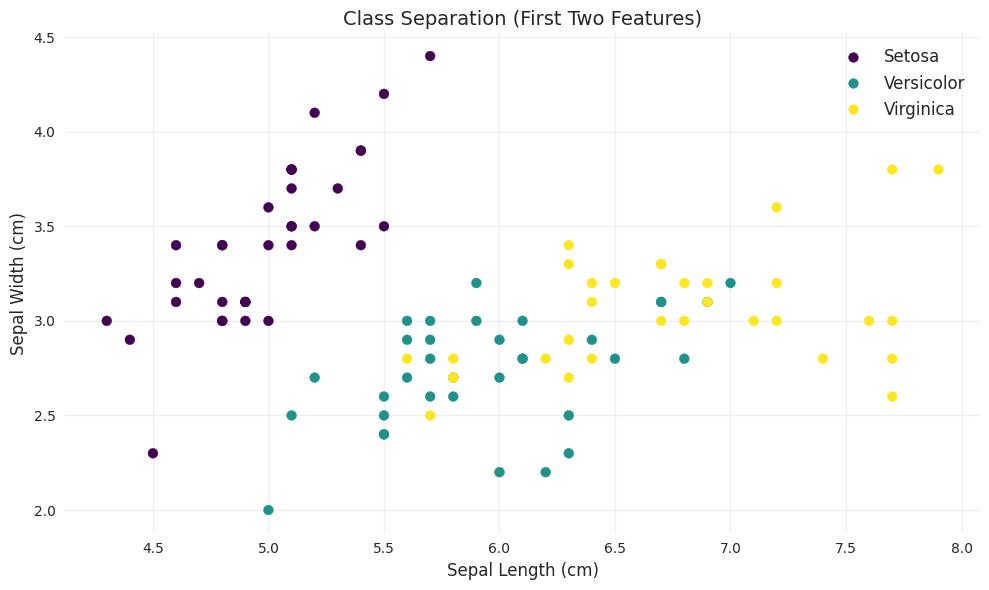

Scikit-learn Implementation:
K= 1: Accuracy = 93.33%
K= 3: Accuracy = 95.56%
K= 5: Accuracy = 97.78%
K= 7: Accuracy = 95.56%
K= 9: Accuracy = 95.56%
K=11: Accuracy = 93.33%

From-Scratch Implementation:
K= 1: Accuracy = 93.33%
K= 3: Accuracy = 95.56%
K= 5: Accuracy = 97.78%
K= 7: Accuracy = 95.56%
K= 9: Accuracy = 95.56%
K=11: Accuracy = 93.33%


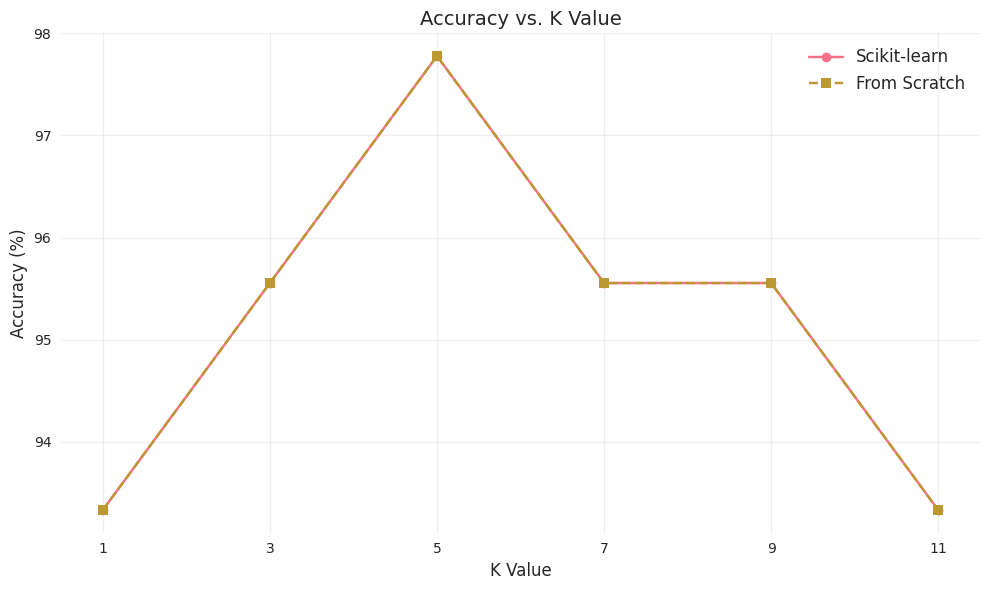


Best K: 5 (Accuracy: 97.78%)


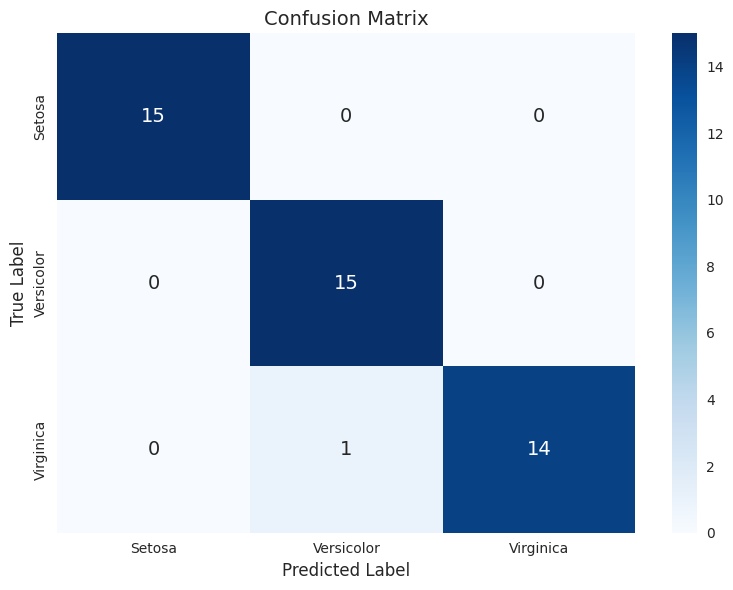


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.94      1.00      0.97        15
   Virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Overall Accuracy: 97.78%

Classifying sample [5.1, 3.5, 1.4, 0.2] with K=3

Top 3 neighbors:
1. Distance: 0.0000, Class: Setosa
2. Distance: 0.1000, Class: Setosa
3. Distance: 0.1414, Class: Setosa

Voting results:
Setosa: 3 votes
Versicolor: 0 votes
Virginica: 0 votes

Predicted class: Setosa

Classifying sample [6.0, 3.0, 4.5, 1.5] with K=3

Top 3 neighbors:
1. Distance: 0.1000, Class: Versicolor
2. Distance: 0.1732, Class: Versicolor
3. Distance: 0.3162, Class: Versicolor

Voting results:
Setosa: 0 votes
Versicolor: 3 votes
Virginica: 0 votes

Predicted class: Versicolor


In [9]:
"""
Enhanced kNN implementation with performance visualization
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report)
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')  # Updated style name
sns.set_style("whitegrid")
sns.set_palette("husl")

def euclidean_dist(p1: np.ndarray, p2: np.ndarray) -> float:
    """Calculate Euclidean distance between two points"""
    return np.sqrt(np.sum((p1 - p2) ** 2))

def find_neighbors(dataset: pd.DataFrame, sample: pd.Series, k: int) -> np.ndarray:
    """Find k nearest neighbors for a sample"""
    distances = np.sqrt(np.sum((dataset - sample.values) ** 2, axis=1))
    return np.argpartition(distances, k)[:k]

def vote(neighbors: np.ndarray, y: np.ndarray) -> int:
    """Perform majority voting among neighbors"""
    votes = {}
    for label in y[neighbors]:
        votes[label] = votes.get(label, 0) + 1
    return max(votes.items(), key=lambda x: x[1])[0]

def plot_accuracy_vs_k(k_list, skl_errors, scratch_errors):
    """Plot accuracy vs K for both implementations"""
    plt.figure(figsize=(10, 6))
    plt.plot(k_list, 100-np.array(skl_errors), 'o-', label='Scikit-learn')
    plt.plot(k_list, 100-np.array(scratch_errors), 's--', label='From Scratch')
    plt.xlabel('K Value', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.title('Accuracy vs. K Value', fontsize=14)
    plt.xticks(k_list)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes,
                annot_kws={"size": 14})
    plt.title('Confusion Matrix', fontsize=14)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_class_separation(X, y, classes):
    """Plot class separation using first two features"""
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    plt.xlabel('Sepal Length (cm)', fontsize=12)
    plt.ylabel('Sepal Width (cm)', fontsize=12)
    plt.title('Class Separation (First Two Features)', fontsize=14)
    plt.legend(handles=scatter.legend_elements()[0],
               labels=classes, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def print_metrics(y_true, y_pred, classes):
    """Print classification metrics"""
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=classes))
    print(f"Overall Accuracy: {accuracy_score(y_true, y_pred):.2%}")

def classify_unknown_sample(unknown_sample, X_train, y_train, k=3):
    """Classify unknown sample with visualization"""
    # Calculate distances
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_dist(unknown_sample, X_train.iloc[i])
        distances.append((dist, y_train[i]))

    # Sort and get neighbors
    distances.sort()
    neighbors = distances[:k]

    # Print results
    class_names = ['Setosa', 'Versicolor', 'Virginica']
    print(f"\nClassifying sample {unknown_sample} with K={k}")
    print("\nTop 3 neighbors:")
    for i, (dist, label) in enumerate(neighbors):
        print(f"{i+1}. Distance: {dist:.4f}, Class: {class_names[label]}")

    # Voting
    votes = {0:0, 1:0, 2:0}
    for _, label in neighbors:
        votes[label] += 1

    print("\nVoting results:")
    for cls, count in votes.items():
        print(f"{class_names[cls]}: {count} votes")

    predicted = max(votes.items(), key=lambda x: x[1])[0]
    print(f"\nPredicted class: {class_names[predicted]}")
    return predicted

if __name__ == '__main__':
    # Load and prepare data
    df = pd.read_csv('iris.csv', header=None)
    class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    df[4] = df[4].map(class_mapping)
    class_names = list(class_mapping.keys())
    simplified_names = ['Setosa', 'Versicolor', 'Virginica']

    # Split data
    X = df.iloc[:, :4]
    y = df[4].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y)

    # Visualizations
    plot_class_separation(X_train.values, y_train, simplified_names)

    # Scikit-learn implementation
    print("Scikit-learn Implementation:")
    skl_errors = []
    best_k, best_acc = 0, 0
    best_preds = None

    for k in [1, 3, 5, 7, 9, 11]:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        skl_errors.append((1-acc)*100)

        if acc > best_acc:
            best_acc = acc
            best_k = k
            best_preds = y_pred

        print(f'K={k:2d}: Accuracy = {acc:.2%}')

    # From-scratch implementation
    print("\nFrom-Scratch Implementation:")
    scratch_errors = []
    for k in [1, 3, 5, 7, 9, 11]:
        preds = []
        for i in range(len(X_test)):
            neighbors = find_neighbors(X_train, X_test.iloc[i], k)
            pred = vote(neighbors, y_train)
            preds.append(pred)
        acc = accuracy_score(y_test, preds)
        scratch_errors.append((1-acc)*100)
        print(f'K={k:2d}: Accuracy = {acc:.2%}')

    # Performance plots
    plot_accuracy_vs_k([1, 3, 5, 7, 9, 11], skl_errors, scratch_errors)

    # Best model evaluation
    print(f"\nBest K: {best_k} (Accuracy: {best_acc:.2%})")
    plot_confusion_matrix(y_test, best_preds, simplified_names)
    print_metrics(y_test, best_preds, simplified_names)

    # Example classifications
    classify_unknown_sample([5.1, 3.5, 1.4, 0.2], X_train, y_train)  # Setosa
    classify_unknown_sample([6.0, 3.0, 4.5, 1.5], X_train, y_train)  # Boundary case

# Discussion


The random_state parameter is a seed that controls the randomization process.

* Using the same random_state value gives you the same random result every time.
* Different random_state values give different but still random results.

The error rate behavior with increasing K values (first dropping, then rising) is due to the trade-off between two types of errors in KNN:

When K is too small (e.g., K=1):
* The model is very sensitive to noise
* Each prediction is based on very few neighbors
* Case of "overfitting" - the model captures noise in the training data.
* Example: If the nearest neighbor happens to be an outlier, we'll make wrong prediction


When K is too large (e.g., K=15):

* The model becomes too generalized.
* Includes too many neighbors in the voting
* Case of "underfitting" - the model loses ability to capture local patterns
* Example: For a point near the boundary between two classes, including too many far-away neighbors can overwhelm the votes of the closer, more relevant neighbors

Which K to choose?

1. Rule of thumb: K=sqrt.(n) where n=number of training data
In this case n=150. K ~ 10 or less.

2. Issues with k=15 in Iris Dataset:
* Total dataset: 150 samples
* Training set (70%): ~105 samples
* Test set (30%): ~45 samples
* k=15 means each prediction uses 15 neighbors
* This is a large portion of the training data (about 14%).

3. Hence, k=5 is a reasonable choice.


#How does Cross validation work?

X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

Fold 1:
* Training data: [2, 3, 4, 5, 6, 7, 8, 9]
* Testing data:  [0, 1]

Fold 2:
* Training data: [0, 1, 4, 5, 6, 7, 8, 9]
* Testing data:  [2, 3]

Fold 3:
* Training data: [0, 1, 2, 3, 6, 7, 8, 9]
* Testing data:  [4, 5]

Fold 4:
* Training data: [0, 1, 2, 3, 4, 5, 8, 9]
* Testing data:  [6, 7]

Fold 5:
* Training data: [0, 1, 2, 3, 4, 5, 6, 7]
* Testing data:  [8, 9]

The key points are:

* Each sample appears in the test set exactly once
* Each sample appears in the training set 4 times (n_splits-1)
The size of each fold is approximately equal
The shuffling ensures random distribution of samples

#Metrics

Read the following examples for explanation:

###Accuracy
* Out of 50 test samples:
* 45 correct predictions, 5 wrong predictions
* Accuracy = (45/50) × 100% = 90%
* Use this if dataset is balanced.

### Precision
If model predicted 15 flowers as Virginica:
* 13 were actually Virginica (True Positives)
* 2 were actually Versicolor (False Positives)
* Precision = (13/15) × 100% = 86.7%
* Use this if false positive is costly.

### Recall
If there are 15 actual Virginica flowers:
* 13 were correctly identified (True Positives)
* 2 were misclassified as Versicolor (False Negatives)
* Recall = (13/15) × 100% = 86.7%
* Use this when misclassification error is costly.

### F1 Score
* Precision = 86.7%, Recall = 86.7%
* F1 = 2 × (0.867 × 0.867) / (0.867 + 0.867)
* F1 = 86.7%
* Use this if dataset is inbalanced.

# Confusion matrix

You can work out the metrics (accuracy, precision, recall, f1-score) from the CM.

Consider the followings:
1. Precision: The model predicted 55 class 0, actually only 50 is class 0 and 5 is clas 1.
2. Recall: There are actually 53 class 0, only 50 are correctly identified. 3 are misclassified.
3. Accuracy: Out of 163 test samples, 137 are correctly classified.


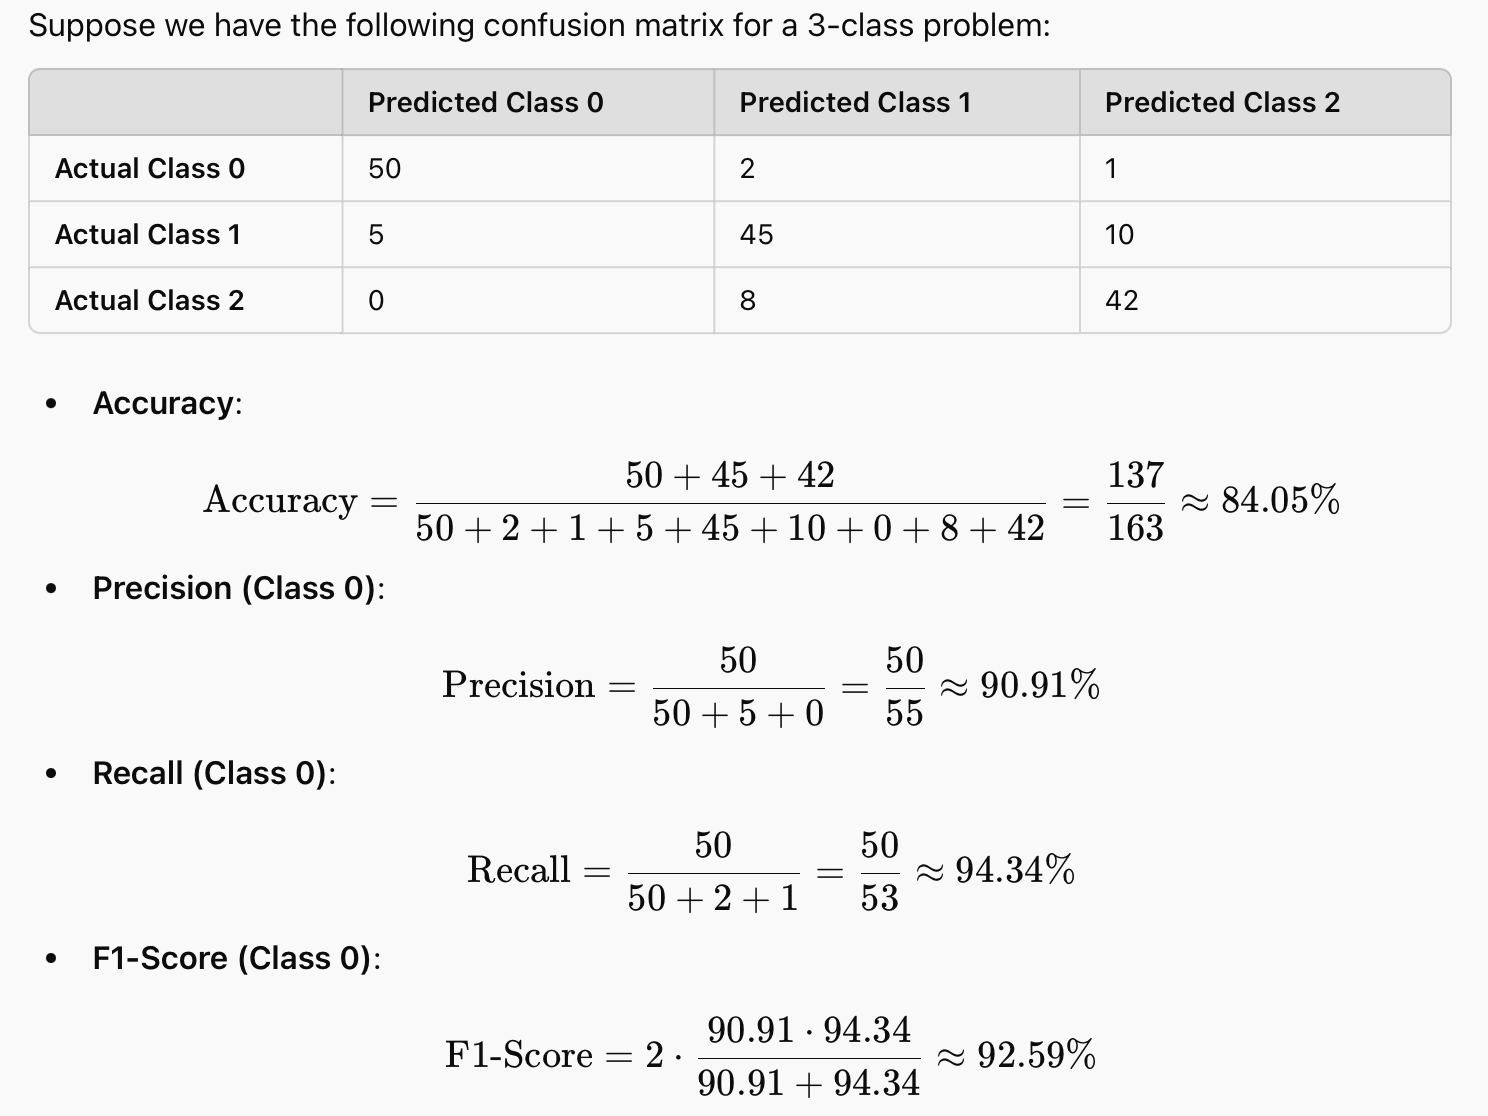